# Introduction to Scikit-Learn (sklearn)

0. An end to end sklearn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions or our data
4. =>Evaluating the model 
5. Improve the model
6. Save and load trained model
7. Putting it all together!

### ROC and AUC

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# load the dataset
heart_disease = pd.read_csv("dataset/heart-disease.csv")

np.random.seed(42)
# create features and labels
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# choose the model
rfc = RandomForestClassifier()

# train the model
rfc.fit(X_train, y_train);

### Accuracy

In [3]:
cv_accuracy = cross_val_score(rfc, X, y, cv=5, scoring="accuracy")
np.mean(cv_accuracy)

0.8248087431693989

### Area under ROC curve or AUC
comparassion of models true positive rate (tpr) vs models false positive rate (fpr)
* True positive = predicting 1 and truth 1
* False positive = predicting 1 and truth 0
* True negative = predicting 0 and truth 0
* False negative = predicting 0 truth 1


In [4]:
from sklearn.metrics import roc_curve

In [5]:
y_probs = rfc.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]

In [6]:
y_prob = rfc.predict(X_test)

In [8]:
# calculate fpr, tpr and thersholds
fpr, tpr, thersholds = roc_curve(y_test, y_probs_positive)
fpr, tpr, thersholds;


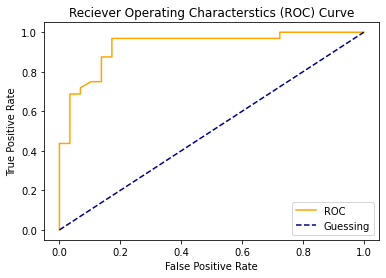

In [11]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characterstics (ROC) Curve")
        
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [12]:
from sklearn.metrics import roc_auc_score

# area under the roc curve
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

### Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [14]:
TP = np.sum((y_test == y_pred) & (y_pred == 1))
TN = np.sum((y_test == y_pred) & (y_pred == 0))
FP = np.sum((y_test != y_pred) & (y_pred == 1))
FN = np.sum((y_test != y_pred) & (y_pred == 0))
'TP', TP, 'TN', TN, 'FP', FP, 'FN', FN

('TP', 28, 'TN', 24, 'FP', 5, 'FN', 4)

In [16]:
pd.crosstab(y_test,
            y_pred,
           rownames = ['Actual Labels'],
           colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [22]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gyon\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    |            |   1% 
conda-4.10.3         | 2.9 MB    | 2          |   2% 
conda-4.10.3         | 2.9 MB    | 4          |   4% 
conda-4.10.3         | 2.9 MB    | 6          |   7% 
conda-4.10.3         | 2.9 MB    | 9          |  10% 
conda-4.10.3         | 2.9 MB    | #3         |  14% 


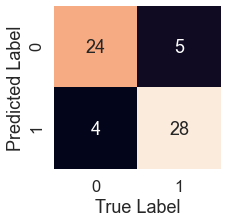

In [25]:
import seaborn as sns

# set a font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

def plot_conf_matrix(conf_mat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat, 
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top-0.5);

plot_conf_matrix(conf_mat)

### Classification Report

In [26]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test,
                                   y_pred,
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


In [21]:
# where precision and recall comes important?

disease_true = np.zeros(10_000)
disease_true[0] = 1

disease_preds = np.zeros(10_000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\gyon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gyon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gyon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
